In [1]:
# imports
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_rows', 40)
pd.set_option('display.max_columns', 40)
#import plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.rcParams['figure.figsize'] = (18.0, 6.0)
import seaborn as sns

In [2]:
train=pd.read_csv('train_ajEneEa.csv')

In [4]:
print(train.shape)

(43400, 12)


In [6]:
# binary classification
print(train['stroke'].unique())

[0 1]


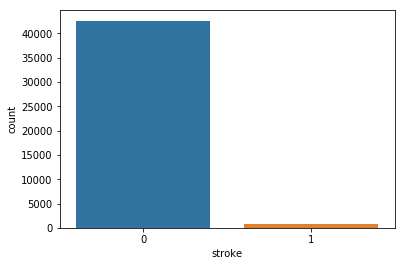

In [7]:
# Heavy class Imbalance
sns.countplot(train['stroke'])

In [9]:
# 54.4:1
print(train['stroke'].value_counts())

0    42617
1      783
Name: stroke, dtype: int64


In [11]:
# Divide into categorical and continuous data
cat=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']
cont=['age','avg_glucose_level','bmi']

In [12]:
# Skewness of the distribution
print(train[cont].skew())

age                 -0.102497
avg_glucose_level    1.675405
bmi                  0.898728
dtype: float64


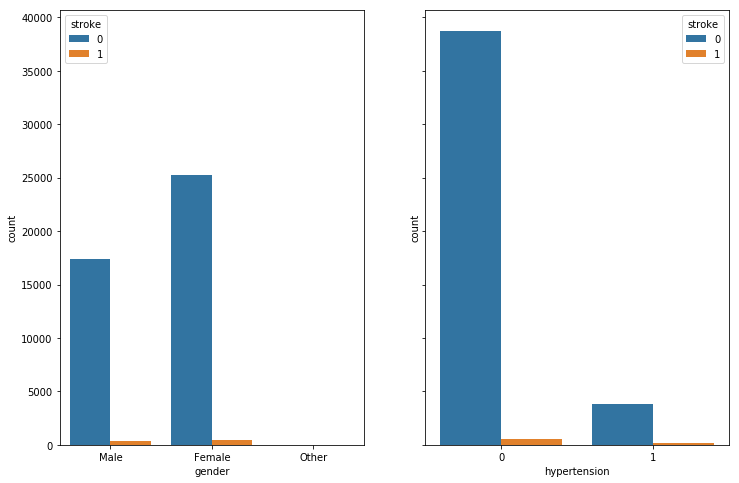

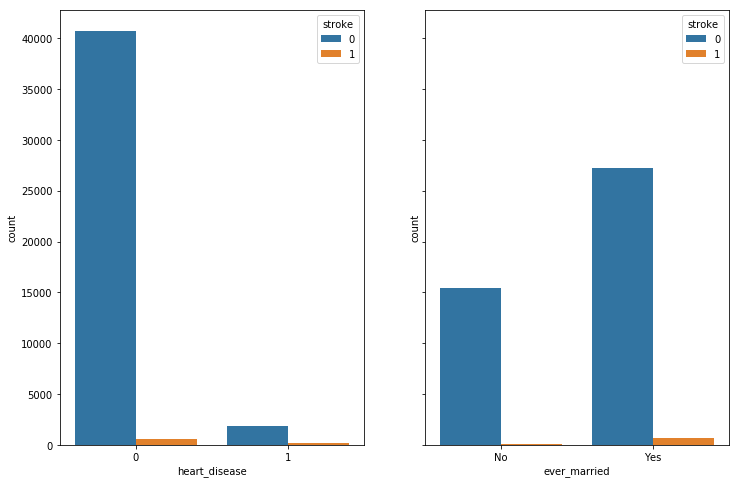

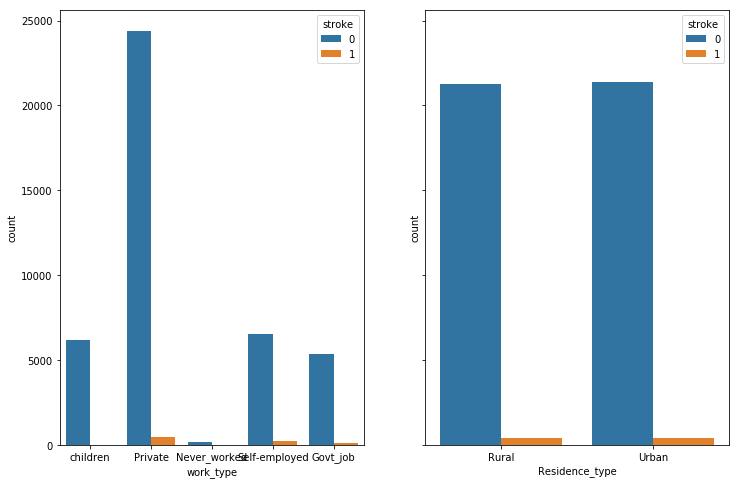

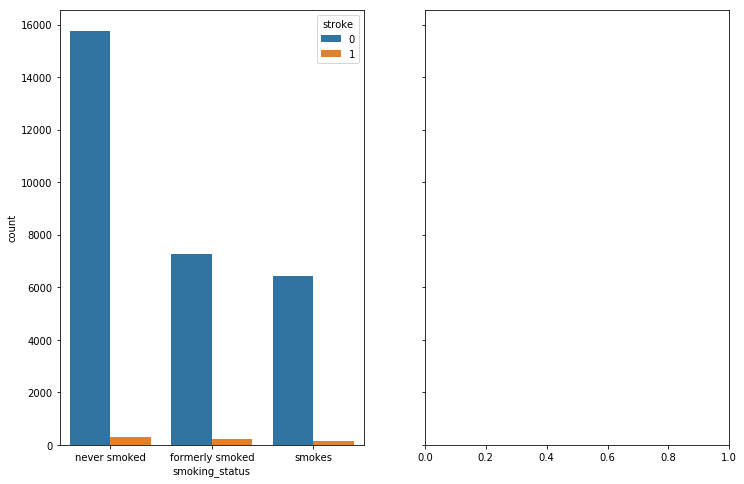

In [16]:
# Count of each label in each category

#names of all the columns
cols = train[cat[0:-1]].columns

#Plot count plot for all attributes in a 3*3 grid
n_cols = 2
n_rows = 4
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(12, 8))
    for j in range(n_cols):
        try:
            sns.countplot(x=cols[i*n_cols+j], data=train[cat], ax=ax[j],hue='stroke')
        except:
            pass

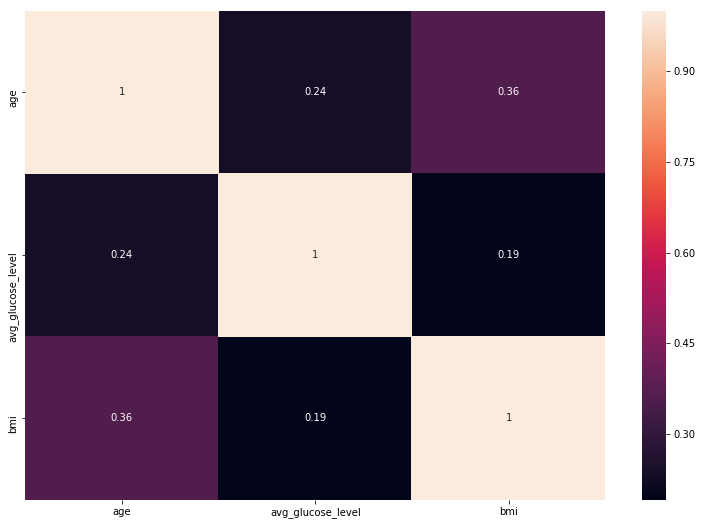

In [18]:
# Correlation among continuous variables
correlationMatrix = train[cont].corr().abs()

plt.subplots(figsize=(13, 9))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

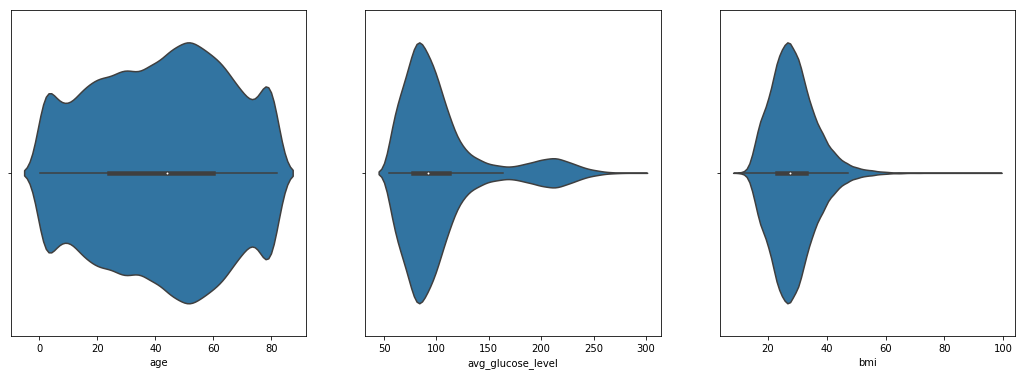

In [23]:
#number of features considered
n_cols = 3
n_rows = 1
#dataframe with only continuous features
data=train[cont]

#get the names of all the columns
cols=train[cont].columns 
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(18, 6))
    for j in range(n_cols):
        try:
            sns.violinplot(train[cols[i*n_cols+j]].dropna(), ax=ax[j])
        except:
            pass